<a href="https://colab.research.google.com/github/guy-davidi/AI---MUSIC/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers.pooling import AveragePooling2D
import tensorflow as tf
import tensorflow.keras
import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Activation,Conv2D, MaxPooling2D,Flatten
import matplotlib.pyplot as plt


#load the fashine mnist data
(x_tarin,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()

#normalize the imges
x_train = x_tarin /255.0
x_test = x_test /255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

model = keras.models.Sequential([
    Conv2D(6, kernel_size=5, strides=1, activation='tanh', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.5),
    AveragePooling2D(pool_size=(2, 2), strides=2), #S2
    Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    AveragePooling2D(pool_size=(2, 2), strides=2), #S4
    Conv2D(120, kernel_size=5, activation='tanh'), #C5
    Flatten(), #Flatten
    Dense(84, activation='tanh'), #F6
    Dense(10, activation='softmax') #Output layer
])



#lr=1e-2
opt = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
print(model.summary())

EPOCHS = 20
BATCH_SIZE = 128

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

[9 0 0 ... 3 0 5]
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 batch_normalization_14 (Bat  (None, 28, 28, 6)        24        
 chNormalization)                                                
                                                                 
 dropout_38 (Dropout)        (None, 28, 28, 6)         0         
                                                                 
 average_pooling2d_74 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_113 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_75 (Avera  (None

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.5401 - accuracy: 0.8042 - val_loss: 0.4683 - val_accuracy: 0.8245
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3892 - accuracy: 0.8594 - val_loss: 0.3986 - val_accuracy: 0.8522
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3484 - accuracy: 0.8716 - val_loss: 0.3548 - val_accuracy: 0.8693
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3235 - accuracy: 0.8808 - val_loss: 0.3281 - val_accuracy: 0.8794
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3068 - accuracy: 0.8879 - val_loss: 0.3237 - val_accuracy: 0.8814
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2900 - accuracy: 0.8920 - val_loss: 0.3170 - val_accuracy: 0.8854
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2792 - accuracy: 0.8961 - val_loss: 0.3142 - val_accuracy: 0.8829
E

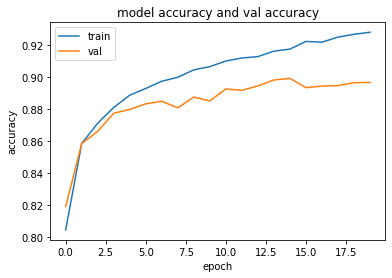

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy and val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()


In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model losss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()